<a href="https://colab.research.google.com/github/RobertinoGladden/Python_collection/blob/master/AIR_QUALITY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUGAS BESAR PEMROGRAMAN PYTHON**
---
**GROUP 4 | AIR QUALITY**

*   Robertino Gladden Narendra
*   Farhan Aditya Kusuma
*   M. Raihan Ripaie
*   Aline Angeline Ka Lele
*   M. Shadqi Azka Pratama



**DATA AIR QUALITY**
---



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from catboost import CatBoostRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


data = pd.read_csv('airQuality.csv')
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%Y-%m-%d %H.%M.%S')
data = data.sort_values('DateTime')
data_cleaned = data.dropna()


In [ ]:
data_cleaned

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
510,2004-01-04,00.00.00,"1,6",1143.0,106.0,"6,3",825.0,96.0,986.0,86.0,1477.0,978.0,"12,0","61,6","0,8593",2004-01-04 00:00:00
511,2004-01-04,01.00.00,"1,2",1044.0,100.0,"5,1",770.0,85.0,1031.0,70.0,1425.0,944.0,"11,5","63,9","0,8652",2004-01-04 01:00:00
512,2004-01-04,02.00.00,"1,1",1034.0,71.0,"4,1",716.0,50.0,1085.0,55.0,1405.0,891.0,"10,7","67,2","0,8630",2004-01-04 02:00:00
513,2004-01-04,03.00.00,"0,9",956.0,72.0,"4,0",713.0,-200.0,1099.0,-200.0,1422.0,849.0,"9,0","73,1","0,8394",2004-01-04 03:00:00
514,2004-01-04,04.00.00,"0,7",909.0,44.0,"2,4",615.0,57.0,1237.0,49.0,1322.0,790.0,"10,2","66,6","0,8299",2004-01-04 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8809,2005-12-03,19.00.00,"0,8",1177.0,-200.0,"7,5",878.0,289.0,641.0,152.0,1224.0,844.0,"14,0","47,8","0,7582",2005-12-03 19:00:00
8810,2005-12-03,20.00.00,"2,4",1383.0,-200.0,"14,1",1119.0,550.0,522.0,201.0,1415.0,1310.0,"13,2","51,4","0,7760",2005-12-03 20:00:00
8811,2005-12-03,21.00.00,"3,3",1363.0,-200.0,"12,4",1064.0,679.0,536.0,221.0,1350.0,1353.0,"12,0","56,1","0,7832",2005-12-03 21:00:00
8812,2005-12-03,22.00.00,"0,9",1087.0,-200.0,"5,8",803.0,314.0,699.0,157.0,1130.0,907.0,"11,6","54,7","0,7454",2005-12-03 22:00:00


In [ ]:
data_cleaned.head

<bound method NDFrame.head of             Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
510   2004-01-04  00.00.00    1,6       1143.0     106.0      6,3   
511   2004-01-04  01.00.00    1,2       1044.0     100.0      5,1   
512   2004-01-04  02.00.00    1,1       1034.0      71.0      4,1   
513   2004-01-04  03.00.00    0,9        956.0      72.0      4,0   
514   2004-01-04  04.00.00    0,7        909.0      44.0      2,4   
...          ...       ...    ...          ...       ...      ...   
8809  2005-12-03  19.00.00    0,8       1177.0    -200.0      7,5   
8810  2005-12-03  20.00.00    2,4       1383.0    -200.0     14,1   
8811  2005-12-03  21.00.00    3,3       1363.0    -200.0     12,4   
8812  2005-12-03  22.00.00    0,9       1087.0    -200.0      5,8   
8813  2005-12-03  23.00.00    0,1       1028.0    -200.0      3,9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
510           825.0     96.0         986.0     86.0        1477.0   
511

In [ ]:
rowValue, colValue = data_cleaned.shape
print(f"Jumlah baris: {rowValue}")
print(f"Jumlah kolom: {colValue}")

Jumlah baris: 9357
Jumlah kolom: 16


In [ ]:
print(data_cleaned.dtypes)

Date                     object
Time                     object
CO(GT)                   object
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                 object
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                        object
RH                       object
AH                       object
DateTime         datetime64[ns]
dtype: object


In [ ]:
missing_values = data.isnull().sum()

print(missing_values)

print("Jumlah baris sebelum dihapus:", len(data))
print("Jumlah baris setelah dihapus:", len(data_cleaned))


Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
DateTime         114
dtype: int64
Jumlah baris sebelum dihapus: 9471
Jumlah baris setelah dihapus: 9357


In [ ]:
dupValue = data.duplicated().sum()
print(f"Jumlah duplicated value: {dupValue}")

Jumlah duplicated value: 113


In [ ]:
for kolom in data_cleaned.columns[2:]:
    zatValue = data_cleaned[kolom].count()
    print(f"Jumlah {kolom}: {zatValue}")

Jumlah CO(GT): 9357
Jumlah PT08.S1(CO): 9357
Jumlah NMHC(GT): 9357
Jumlah C6H6(GT): 9357
Jumlah PT08.S2(NMHC): 9357
Jumlah NOx(GT): 9357
Jumlah PT08.S3(NOx): 9357
Jumlah NO2(GT): 9357
Jumlah PT08.S4(NO2): 9357
Jumlah PT08.S5(O3): 9357
Jumlah T: 9357
Jumlah RH: 9357
Jumlah AH: 9357
Jumlah DateTime: 9357


**PENGUKURAN ZAT**
---



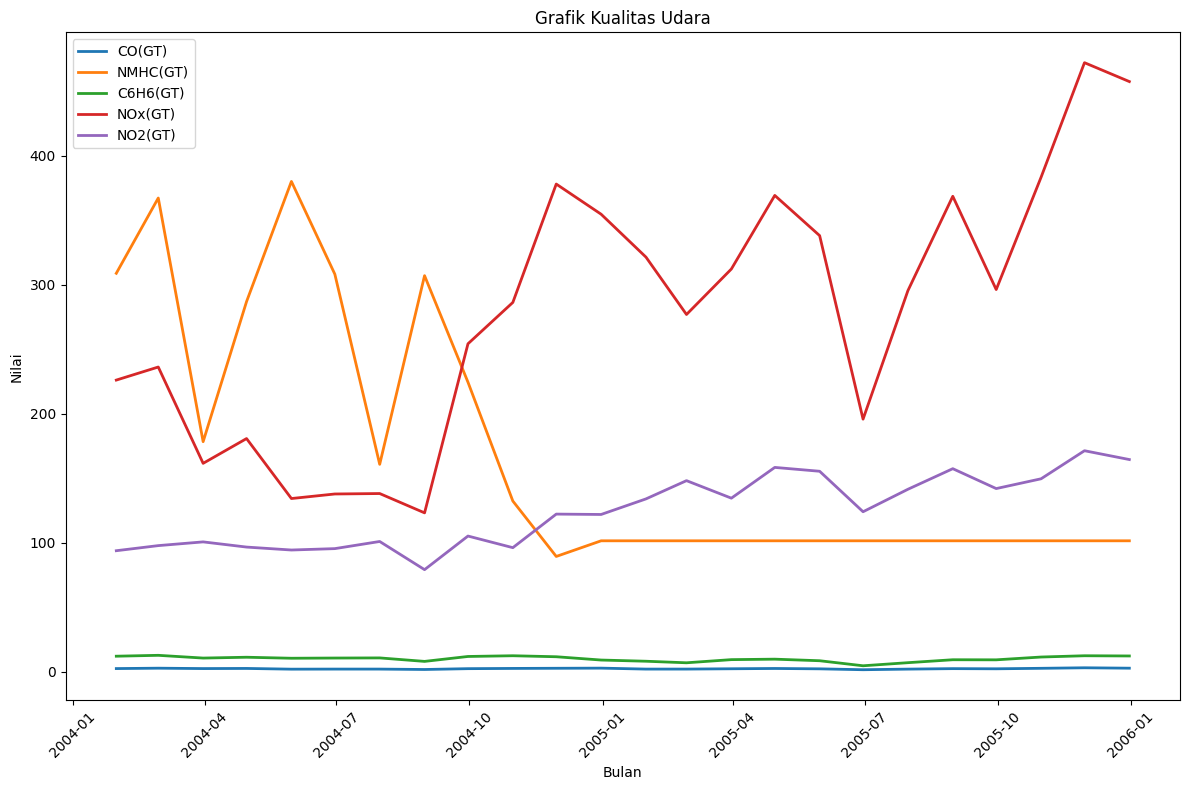

In [ ]:
data['DateTime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str), format='%Y-%m-%d %H.%M.%S', errors='coerce')
start_date = '2004-01-04 00:00:00'
end_date = '2005-12-03 23:00:00'
data = data[(data['DateTime'] >= start_date) & (data['DateTime'] <= end_date)]

cols_to_clean = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

for col in cols_to_clean:
    if data[col].dtype == 'object':
        data.loc[:, col] = data[col].str.replace(',', '.')
        data.loc[:, col] = pd.to_numeric(data[col], errors='coerce')


data = data.replace(-200, float('nan'))

selected_features = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
monthly_avg = data.resample('M', on='DateTime').mean(numeric_only=True).interpolate(method='linear')
monthly_avg['NMHC(GT)'] = monthly_avg['NMHC(GT)'].replace(-200, float('nan'))


plt.figure(figsize=(12, 8))
sns.set_palette("tab10")
for feature in selected_features:
    sns.lineplot(data=monthly_avg, x=monthly_avg.index, y=feature, label=feature, linewidth=2)

plt.xlabel('Bulan')
plt.ylabel('Nilai')
plt.title('Grafik Kualitas Udara')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**KORELASI DATASET CO & NO2**
---



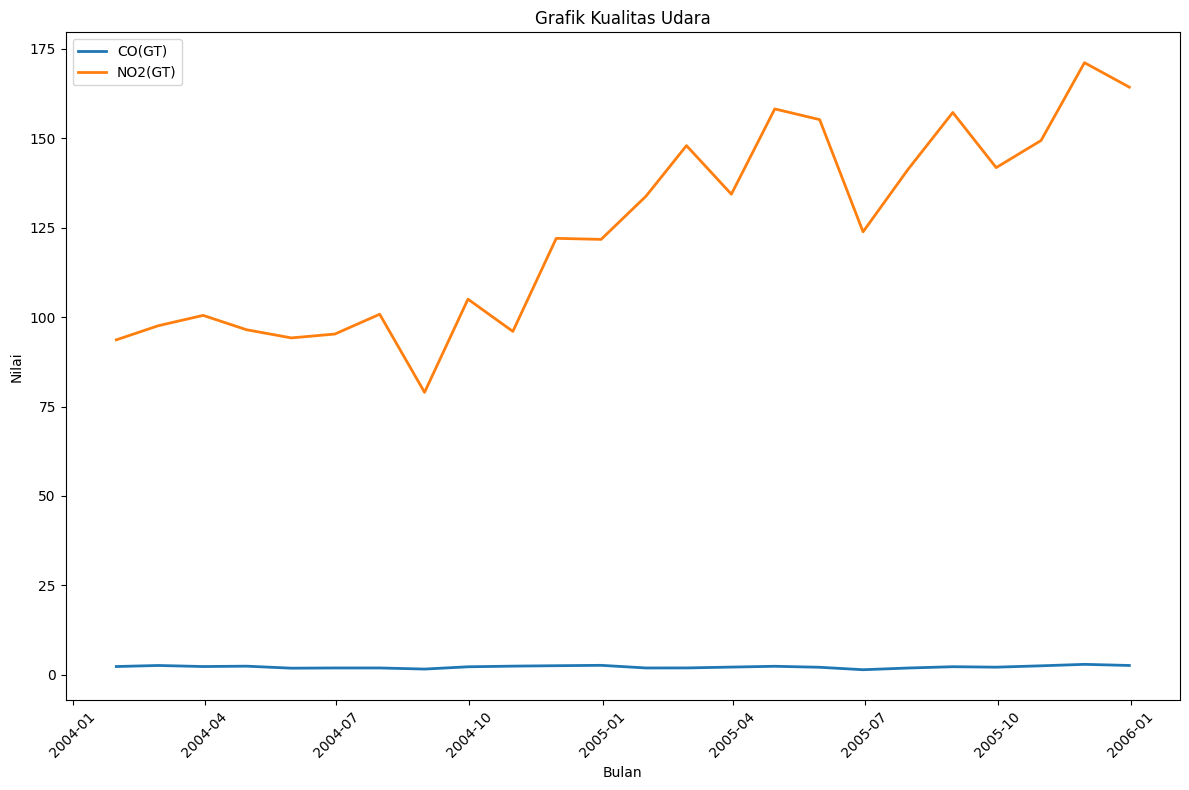

In [ ]:
data['DateTime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str), format='%Y-%m-%d %H.%M.%S', errors='coerce')
start_date = '2004-01-04 00:00:00'
end_date = '2005-12-03 23:00:00'
data = data[(data['DateTime'] >= start_date) & (data['DateTime'] <= end_date)]

cols_to_clean = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
for col in cols_to_clean:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace(',', '.')
        data[col] = pd.to_numeric(data[col], errors='coerce')

data = data.replace(-200, float('nan'))
selected_features = ['CO(GT)', 'NO2(GT)']
monthly_avg = data.resample('M', on='DateTime').mean(numeric_only=True).interpolate(method='linear')

plt.figure(figsize=(12, 8))
sns.set_palette("tab10")
for feature in selected_features:
    sns.lineplot(data=monthly_avg, x=monthly_avg.index, y=feature, label=feature, linewidth=2)

plt.xlabel('Bulan')
plt.ylabel('Nilai')
plt.title('Grafik Kualitas Udara')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

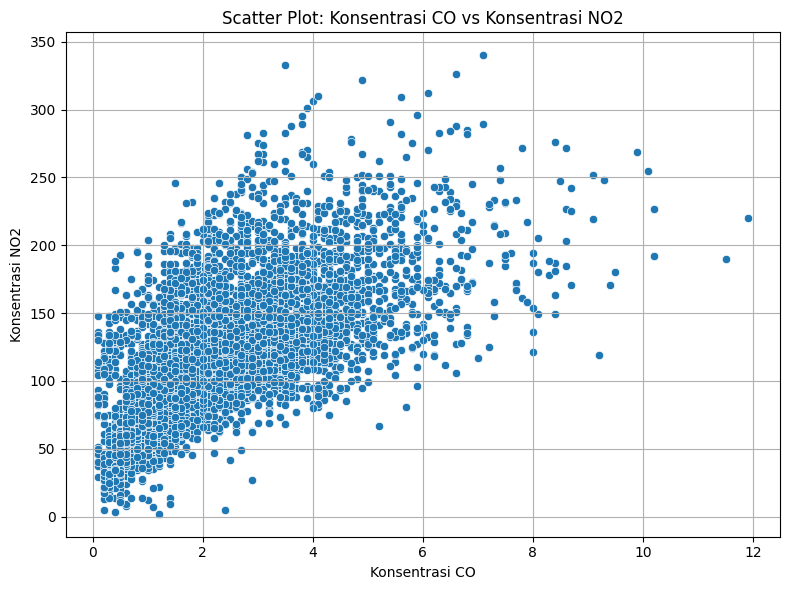

Nilai Korelasi antara CO dan NO2: 0.6833426502920678
Terdapat korelasi positif antara CO dan NO2.


In [ ]:
data['DateTime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str), format='%Y-%m-%d %H.%M.%S', errors='coerce')
start_date = '2004-01-04 00:00:00'
end_date = '2005-12-03 23:00:00'
data = data[(data['DateTime'] >= start_date) & (data['DateTime'] <= end_date)]

cols_to_clean = ['CO(GT)', 'NO2(GT)']

for col in cols_to_clean:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace(',', '.')
        data[col] = pd.to_numeric(data[col], errors='coerce')

data['CO(GT)'] = data['CO(GT)'].replace(-200, float('nan'))
data['NO2(GT)'] = data['NO2(GT)'].replace(-200, float('nan'))
data['NOx(GT)'] = data['NOx(GT)'].replace(-200, float('nan'))

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='CO(GT)', y='NO2(GT)')
plt.xlabel('Konsentrasi CO')
plt.ylabel('Konsentrasi NO2')
plt.title('Scatter Plot: Konsentrasi CO vs Konsentrasi NO2')
plt.grid(True)
plt.tight_layout()
plt.show()

correlation = data['CO(GT)'].corr(data['NO2(GT)'])
print(f"Nilai Korelasi antara CO dan NO2: {correlation}")

if correlation > 0:
    print("Terdapat korelasi positif antara CO dan NO2.")
elif correlation < 0:
    print("Terdapat korelasi negatif antara CO dan NO2.")
else:
    print("Tidak ada korelasi yang jelas antara CO dan NO2.")

**DATASET TRAINING SET & TESTING SET**
---



In [ ]:
features = ['CO(GT)', 'NO2(GT)']
x = data_cleaned[features]
y = data_cleaned[['PT08.S1(CO)', 'PT08.S4(NO2)']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print("shape of x_train:", x_train.shape)
print("shape of x_test:", x_test.shape)
print("shape of y_train:", y_train.shape)
print("shape of y_test:", x_test.shape)

shape of x_train: (7485, 2)
shape of x_test: (1872, 2)
shape of y_train: (7485, 2)
shape of y_test: (1872, 2)


**LINEAR REGRESSION**
---



In [ ]:
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)
target_imputer = SimpleImputer(strategy='mean')
y_train_imputed = target_imputer.fit_transform(y_train)

In [ ]:
model = LinearRegression()
model.fit(x_train_imputed, y_train_imputed)

predictions = model.predict(x_test_imputed)

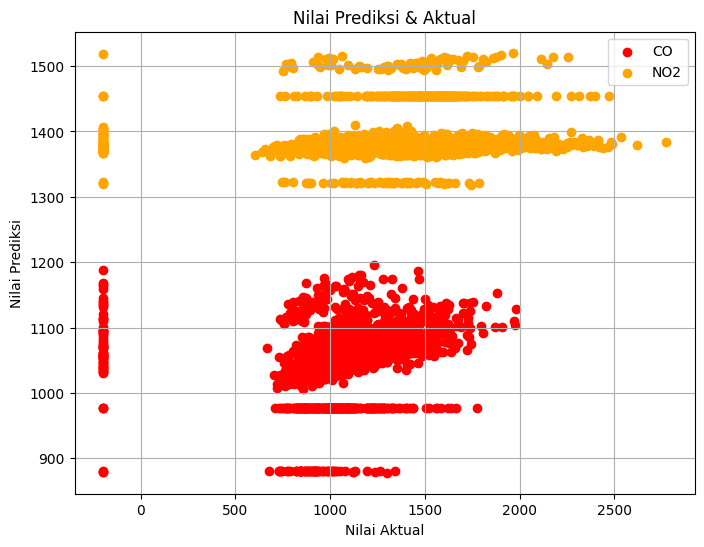

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test.values[:, 0], predictions[:, 0], color='red', label='CO')
plt.scatter(y_test.values[:, 1], predictions[:, 1], color='orange', label='NO2')

plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Nilai Prediksi & Aktual')
plt.legend()
plt.grid(True)
plt.show()

**GRADIENT BOOSTING**
---



In [ ]:
pip install catboost

In [ ]:
features = ['CO(GT)', 'NO2(GT)']
X = data_cleaned[features]
y = data_cleaned[['PT08.S1(CO)', 'PT08.S4(NO2)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer_X = SimpleImputer(strategy='mean')
X_train_imputed = imputer_X.fit_transform(X_train)
X_test_imputed = imputer_X.transform(X_test)

imputer_y = SimpleImputer(strategy='mean')
y_train_imputed = imputer_y.fit_transform(y_train)

model_CO = CatBoostRegressor(random_state=42, verbose=False)
model_CO.fit(X_train_imputed, y_train_imputed[:, 0])

model_NO2 = CatBoostRegressor(random_state=42, verbose=False)
model_NO2.fit(X_train_imputed, y_train_imputed[:, 1])

predictions_CO = model_CO.predict(X_test_imputed)
predictions_NO2 = model_NO2.predict(X_test_imputed)

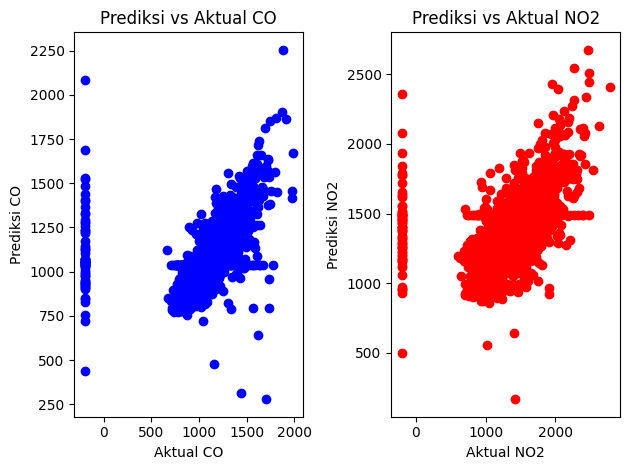

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(y_test['PT08.S1(CO)'], predictions_CO, color='blue')
plt.xlabel('Aktual CO')
plt.ylabel('Prediksi CO')
plt.title('Prediksi vs Aktual CO')

plt.subplot(1, 2, 2)
plt.scatter(y_test['PT08.S4(NO2)'], predictions_NO2, color='red')
plt.xlabel('Aktual NO2')
plt.ylabel('Prediksi NO2')
plt.title('Prediksi vs Aktual NO2')

plt.tight_layout()
plt.show()